In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

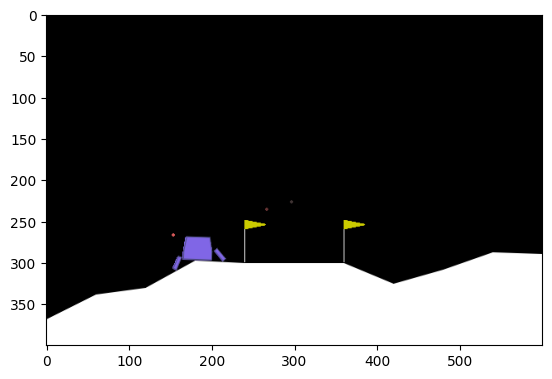

In [2]:
env_name = 'LunarLander-v2'
env = gym.make(env_name,render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render()) # only call this once
done = False
while not done:
    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    _, _, terminated, truncated, info = env.step(action)
    done = terminated or truncated
img.set_data(env.render())

In [3]:
from stable_baselines3 import A2C

2023-06-09 05:10:54.951600: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-09 05:10:54.988280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 05:10:55.528581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
model = A2C('MlpPolicy', env, verbose=False)
# model.learn(total_timesteps=10000)
model.learn(total_timesteps=1E6)

In [ ]:
episodes = 1

for ep in range(episodes):
    obs = env.reset()[0]
    img = plt.imshow(env.render()) # only call this once
    done = False
    while not done:
        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        # pass observation to model to get predicted action
        action, _states = model.predict(obs)
        
        # pass action to env and get info back
        obs, rewards, terminated, truncated, info = env.step(action)
        
        # show the environment on the screen
        env.render()
    img.set_data(env.render())